In [1]:
using LinearAlgebra
using Plots

In [194]:
function simulación(vx,vy,box,n)
    function Átomo(vx,vy,box,n)
    boxs = box
    velx = vx
    vely = vy
    ListaM = zeros(n,1)
    ListaVx = zeros(n,1)
    ListaVy = zeros(n,1)
    ListaPosx = zeros(n,1)
    ListaPosy = zeros(n,1)
    for i in 1:n
        ListaVx[i]=velx
        ListaVy[i]=vely
        ListaPosx[i] = boxs * rand()
        ListaPosy[i] = boxs * rand()
    end 
    return ListaVx, ListaVy, ListaPosx, ListaPosy 
end
    #Toma como argumentos LISTAS
function ForceTotal(Posx,Posy)
    dim = length(Posx)
    g = 9.81
    ϵ = 1
    σ = 1
    m = 0.018
#=Para una partícla vamos a calcular todas las fuerzas que actuan sobre ellas. Prealocamos dos listas que guarden la fuerza total 
en X y Y para cada partícula.=#
    Fuerzax = zeros(dim)
    Fuerzay = zeros(dim)
    for i in 1:dim
#Va tomando la componente y de cada partícula.
        Compy = Posy[i]
#Para ir sumando la fuerza de cada partícula "k" sobre una fija "i"
        Sumfuerzax = 0
        Sumfuerzay = 0
        for k in 1:dim
            if i != k
                Difx = Posx[i] - Posx[k]
                Dify = Posy[i] - Posy[k]
#Esta es la norma de la particula "i" con la "k"... solo para una.
                Normi = norm([Difx, Dify]) 
#Obtenemos la fuerza de Lennard
                F1 = 2.0*(ϵ/Normi)^(12)
                F2 = (ϵ/Normi)^(6)
                F3 = (24.0*σ)/((Normi)^2)
#Dos componentes de la fuerza para el 
                fuerzaix = F3*(F1 - F2)*Difx
                fuerzaiy = F3*(F1 - F2)*Dify
#Como queremos obtener la suma de las fuerzas totales sobre la partícula "i", entonces:
                Sumfuerzax = Sumfuerzax + fuerzaix
                Sumfuerzay = Sumfuerzay + fuerzaiy
            end
        end
#No se olvide que hay un factor adicional en la componente de la fuerza en y.
        Fuerzax[i] = Sumfuerzax
        Fuerzay[i] = Sumfuerzay - m*g*Compy
    end
return Fuerzax, Fuerzay
end
#Función velocidad Verlet, debido a que ya separamos las coordenadas en posición, velocidad y fuerza, nuestra función verlet toma más argumentos.
function SpeedVerlet2(Rx_0,Ry_0,Vx_0,Vy_0,Fx_0,Fy_0,h,t0,tf)
#Definiciones previas:
    arrt = t0:h:tf
    M = length(arrt)
    N = length(Rx_0) #corresponde al número de partículas
    Fac = (h^(2))/2
    L = 30 #Longitud de la caja
    Bd = 0
    Bu = L
    Bl = 0
    Br = L
#Prealocamos listas:
    Forcex = zeros(M,N)
    Forcey = zeros(M,N)
    Positx = zeros(M,N)
    Posity = zeros(M,N)
    Velcyx = zeros(M,N)
    Velcyy = zeros(M,N)
#Asignamos los elementos iniciales a las matrices:
    Forcex[1,:] = Fx_0
    Forcey[1,:] = Fy_0
    Velcyx[1,:] = Vx_0
    Velcyy[1,:] = Vy_0
    Positx[1,:] = Rx_0
    Posity[1,:] = Ry_0
############ Método de velocity Verlet
for i in 1:(M-1)
        Positx[i+1,:] = Positx[i,:] + h*Velcyx[i,:] + Fac*Forcex[i,:]
        Posity[i+1,:] = Posity[i,:] + h*Velcyy[i,:] + Fac*Forcey[i,:]
#Vamos a revisar que las posiciones no hayan atravesado la caja
    for k in 1:N
        if (Positx[i+1,k] < Bl)
            Positx[i+1,k] = Bl - (Positx[i+1,k] - Bl)
            Velcyx[i+1,k] = (-1)*Velcyx[i+1,k]
        end
        if (Positx[i+1,k] > Br)
            Positx[i+1,k] = Br - (Positx[i+1,k] - Br)
            Velcyx[i+1,k] = (-1)*Velcyx[i+1,k]
        end
        if (Posity[i+1,k] < Bd)
            Posity[i+1,k] = Bd - (Posity[i+1,k] - Bd)
            Velcyy[i,k] =  (-1)*Velcyy[i,k]
        end
        if (Posity[i+1,k] > Bu)
            Posity[i+1,k] = Bu - (Posity[i+1,k] - Bu)
            Velcyy[i,k] = (-1)*Velcyy[i,k]
        end
    end
#Recordemos: a mi función ForceTotal le doy dos listas y me regresa dos listas, Fuerzax y Fuerzay
        F_nextx, F_nexty = ForceTotal(Positx[i+1,:],Posity[i+1,:])
        Forcex[i+1,:] = F_nextx
        Forcey[i+1,:] = F_nexty
#Hasta aquí ya calculó la fuerza F_k+1, entonces ya puede encontrar velocidad:
        Velcyx[i+1,:] = Velcyx[i,:] + (h*0.5)*(Forcex[i,:] + Forcex[i+1,:])
        Velcyy[i+1,:] = Velcyy[i,:] + (h*0.5)*(Forcey[i,:] + Forcey[i+1,:])
    end
    return Forcex,Forcey,Positx,Posity,Velcyx,Velcyy
    #return Velcyy
end   
    
    
    Atom = Átomo(vx,vy,box,n)
    Fuerza = ForceTotal(Atom[3],Atom[4])
    Speed = SpeedVerlet2(Atom[3],Atom[4],Atom[1],Atom[2],Fuerza[1],Fuerza[2],0.25,0,10)
    xs = Atom[3]
    ys = Atom[4]
    cuadro_ini = scatter(xs,ys,xrange=(0,box+10),yrange=(0,box+10))
    #println(Speed[3])
    #println(Speed[4])
    t_a = range(1, stop=2, length=8)
    anim = @animate for i in 1:40
    scatter([Speed[3][i,1]],[Speed[4][i,1]],xrange=(0,35),yrange=(0,35),label=false)
    for j in 2:n 
    scatter!([Speed[3][i,j]],[Speed[4][i,j]],xrange=(0,35),yrange=(0,35),label=false)
    end
    #scatter!([Speed[3][i,3]],[Speed[4][i,3]],xrange=(0,10),yrange=(0,10))
    end
    gif(anim,"Bb.gif",fps=2)
end

simulación (generic function with 2 methods)

┌ Info: Saved animation to 
│   fn = /home/joseph/Documentos/Proyecto Compu/Bb.gif
└ @ Plots /home/joseph/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/home/joseph/Documentos/Proyecto Compu/Bb.gif")
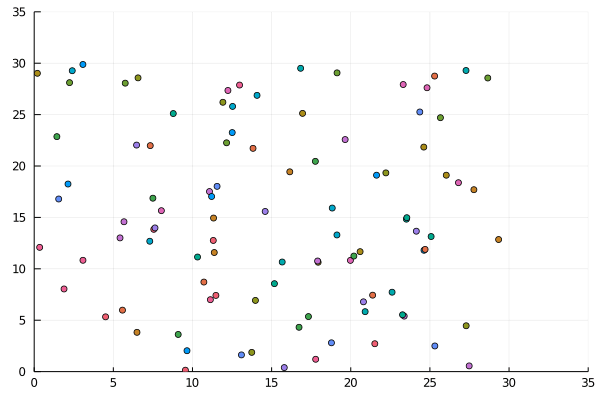

In [195]:
simulación(0,0,30,100)